In [20]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
#import dataset
data = pd.read_csv("D:/DATA SCIENCE/1. Data Scientist/Assignment/12.KNN/Zoo.csv")

In [5]:
data.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [7]:
data.shape

(101, 18)

In [8]:
data.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [9]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [13]:
# Normalizing data frame and excluding categorical data/column
data_norm = norm_func(animal.iloc[:,1:])
data_norm

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.50,0.0,0.0,1.0,0.000000
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.50,1.0,0.0,1.0,0.000000
2,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.00,1.0,0.0,0.0,0.500000
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.50,0.0,0.0,1.0,0.000000
4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.50,1.0,0.0,1.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.25,1.0,0.0,1.0,0.000000
97,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.75,0.0,0.0,0.0,0.833333
98,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.50,1.0,0.0,1.0,0.000000
99,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.00,0.0,0.0,0.0,1.000000


In [14]:
# creat dendrogram 
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch 

In [15]:

z = linkage(data_norm, method="complete",metric="euclidean")

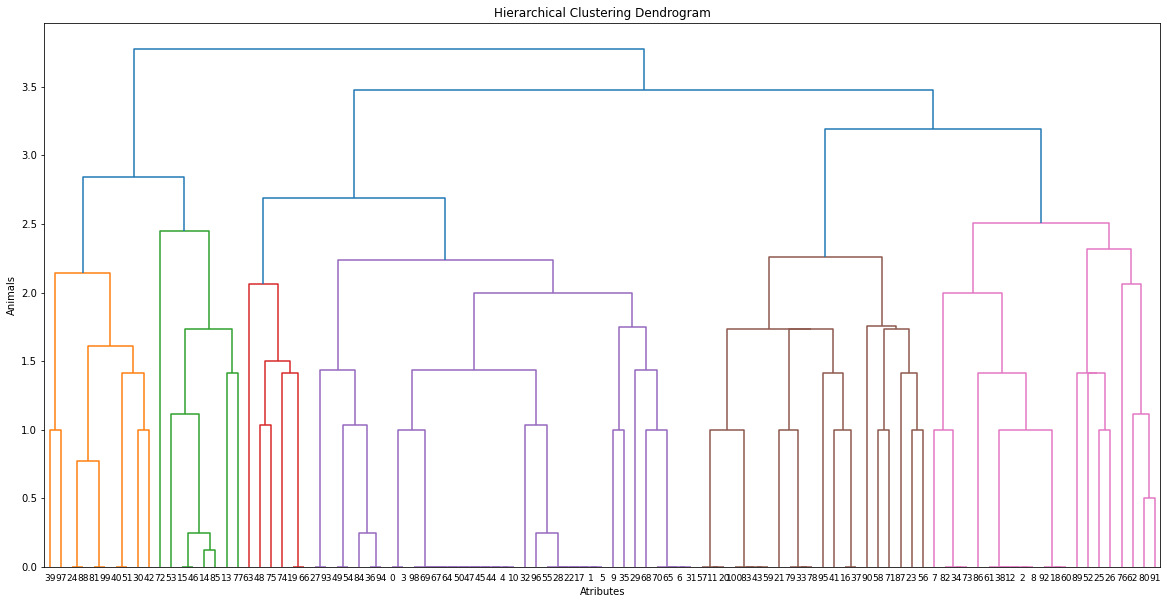

In [37]:
plt.figure(figsize=(20, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Atributes')
plt.ylabel('Animals')
sch.dendrogram(z,
    leaf_rotation=0.,  
    leaf_font_size=9.,) # font size
plt.show()


In [19]:
data.type.unique()

array([1, 4, 2, 7, 6, 5, 3], dtype=int64)

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


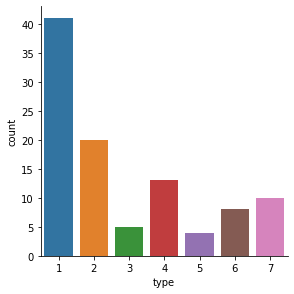

In [30]:
import seaborn as sns
sns.factorplot('type', data=data, kind="count",size = 4,aspect = 1)

In [31]:
from sklearn.cluster import	KMeans
from scipy.spatial.distance import cdist 
import numpy as np

In [34]:
model=KMeans(n_clusters=7)

In [35]:
model.fit(df_norm)

KMeans(n_clusters=7)

In [33]:
model.labels_

array([2, 2, 3, 2, 2, 2, 2, 3, 3, 2, 2, 1, 3, 5, 5, 5, 1, 2, 3, 0, 1, 1,
       2, 1, 4, 6, 6, 2, 2, 2, 4, 2, 2, 1, 3, 2, 2, 1, 3, 4, 4, 1, 4, 1,
       2, 2, 5, 2, 0, 2, 2, 4, 6, 5, 2, 2, 1, 1, 1, 1, 3, 3, 6, 0, 2, 2,
       0, 2, 2, 2, 2, 1, 6, 3, 0, 0, 6, 5, 1, 1, 6, 4, 3, 1, 2, 5, 3, 1,
       4, 6, 1, 6, 3, 2, 2, 1, 2, 4, 2, 4, 1])